In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
file = '/content/marketing_customer_analysis_clean.csv'
df = pd.read_csv(file)
df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [3]:
nums = df.select_dtypes('number') #Numerical columns
cats = df.select_dtypes('object') #Categorical columns
nums.dropna(inplace=True)
cats.dropna(inplace=True)

# Challenge 1

- Check if there are highly correlated features and drop them (if there are any).

- One Hot Encoding of the categorical nominal variables, Ordinal Encoding of the categorical ordinal variables.

In [4]:
from sklearn.preprocessing import OneHotEncoder
#One Hot Encoding of the categorical nominal variables
''' Nominal columns:
customer, state, response(binary),effective_to_date,employmentstatus,gender(binary),location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,
'''
catsnom = cats[['customer', 'state', 'response','effective_to_date','employmentstatus','gender','location_code','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class']]

enc_hot = OneHotEncoder()
nom = enc_hot.fit_transform(catsnom)


In [5]:
#Ordinal Encoding of the categorical ordinal variables.
from sklearn.preprocessing import OrdinalEncoder
''' Ordinal columns:
education,coverage,vehicle_size
'''
catsord = cats[['education','coverage','vehicle_size']]
enc_ord = OrdinalEncoder()
ord = enc_ord.fit_transform(catsord)

# Challenge 2

Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has a noticeably large skew. For example, you might select customer_lifetime_value as a candidate varB which has skew.

1. varA

- Use minmax transform to bring varA's values into the range [0,1].

- Check that varA has been rescaled using a displot or a histogram

2. varB

- Use StandardScaler to standardize the variable or PowerTransform to reduce its skew.
- Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

Hints:

1. Import transformers from the sklearn library from sklearn.preprocessing import ```PowerTransformer, StandardScaler, MinMaxScaler```

- To reduce the skew and standardize a column, PowerTransformer from sklearn has two options (box-cox and yeo-johnson)

-To rescale the column, use the MinMaxScaler transform.

2. Format the column correctly for the transformer. The sklearn transformers expect numpy.ndarray object types as input. To take a pandas column and transform it into the correct form for PowerTransform and Minmax_Scaler use the to_numpy() and reshape(-1,1) methods.

In [ ]:
#visually examining distributions (histograms) of the numerical features
phist = sns.pairplot(nums,kind='hist')

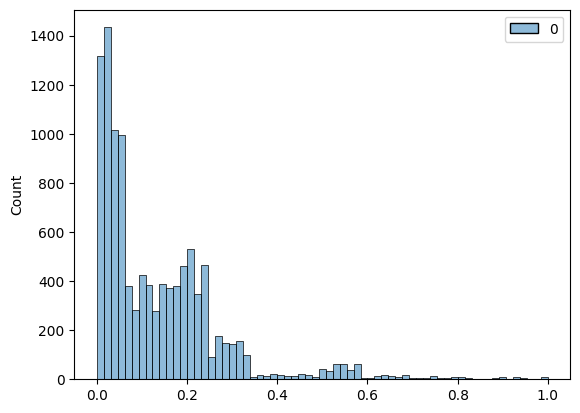

In [41]:
from sklearn.preprocessing import MinMaxScaler
varA = nums[['monthly_premium_auto']].to_numpy()
varB = nums[['customer_lifetime_value']].to_numpy()
scal = MinMaxScaler()
varA_sca = scal.fit_transform(varA)


p = sns.histplot(varA_sca)


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
stan_scal = StandardScaler()
varB_sca = stan_scal.fit_transform(varB)
pow_scal = PowerTransformer()
varB_pow = pow_scal.fit_transform(varB_sca)
varB_pow.mean() #stuck
#p = sns.histplot(varB_pow)


-1.0420425089057382e-17